# CNN Digit Recognizer 

### Project Prerequisites

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
	tf.config.experimental.set_memory_growth(gpu,True)

for gpu in gpus:
	print(gpu)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


### Loading the Data

In [3]:
df = pd.read_csv("Data/train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


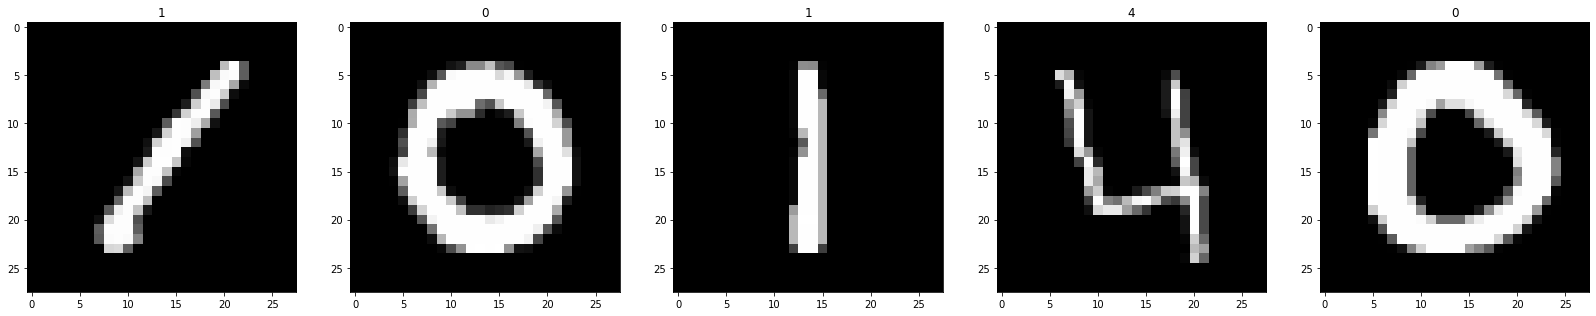

In [4]:
fig,ax = plt.subplots(ncols=5,figsize = (28,28))

for i in range(5):
    labels = df.iloc[i,0]
    img = df.iloc[i,1:].values.reshape(28,28)
    ax[i].imshow(img,cmap = "gray")
    ax[i].title.set_text(labels)

### Preprocessing

In [5]:
X = df.iloc[:,1:].values
y = df.iloc[:,0]

flat_X = X.reshape(-1,28,28,1)

In [6]:
X_normalized = flat_X/255.0

X_train,X_val,y_train,y_val = train_test_split(X_normalized,y,test_size=0.2)

X_train.shape,X_val.shape

((33600, 28, 28, 1), (8400, 28, 28, 1))

### Building the Neural Nets


In [7]:
model = tf.keras.models.Sequential()

# first convolutional block
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,input_shape = (28,28,1),activation="relu"))
# model.add(tf.keras.layers.LeakyReLU(0.2))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

# second convolutional block
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu"))
# model.add(tf.keras.layers.LeakyReLU(0.2))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

# flattening and full connection
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [8]:
LOSS = "sparse_categorical_crossentropy"
OPTIMIZER = "adam"
METRICS = ["accuracy"]

In [9]:
model.compile(loss=LOSS,optimizer=OPTIMIZER,metrics=METRICS)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [14]:
PATH = "PersistedModels"
CALLBACK = tf.keras.callbacks.ModelCheckpoint(save_best_only=True,filepath=PATH)

In [15]:
hist = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=15,callbacks=CALLBACK)

Epoch 1/15
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0047 - accuracy: 0.9984 - val_loss: 0.0610 - val_accuracy: 0.9890
INFO:tensorflow:Assets written to: PersistedModels\assets
Epoch 2/15
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0064 - accuracy: 0.9979 - val_loss: 0.0517 - val_accuracy: 0.9902
INFO:tensorflow:Assets written to: PersistedModels\assets
Epoch 3/15
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0042 - accuracy: 0.9986 - val_loss: 0.0546 - val_accuracy: 0.9906
Epoch 4/15
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0629 - val_accuracy: 0.9890
Epoch 5/15
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.0602 - val_accuracy: 0.9902
Epoch 6/15
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0040 - accuracy: 0.9987 - val_loss: 0.0725 - val_accuracy: 0.9885
Epoch 7/15
1050/1050

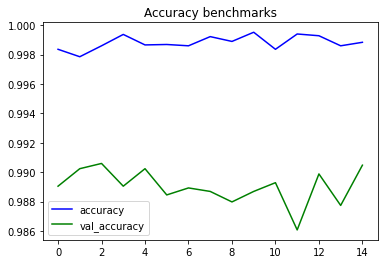

In [29]:
plt.plot(hist.history["accuracy"],color = "blue")
plt.plot(hist.history["val_accuracy"],color = "green")
plt.title("Accuracy benchmarks")
plt.legend(["accuracy","val_accuracy"])
plt.show()

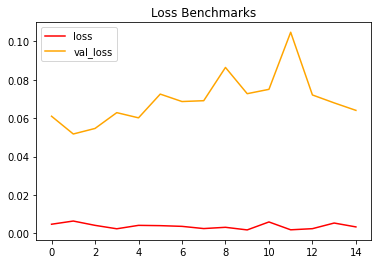

In [28]:
plt.plot(hist.history["loss"],color = "red")
plt.plot(hist.history["val_loss"],color = "orange")
plt.title("Loss Benchmarks")
plt.legend(["loss","val_loss"])
plt.show()

In [16]:
model = tf.keras.models.load_model(PATH)

### Testing

In [17]:
test_df = pd.read_csv("Data/test.csv")
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


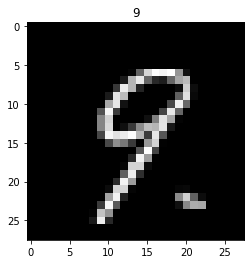

In [43]:
index = int(input("Num: "))
predictions = model.predict(test_df.values.reshape(-1,28,28,1)/255.0)
img = test_df.iloc[index].values.reshape(28,28)
plt.imshow(img,cmap = "gray")
plt.title(np.argmax(predictions[index]))
plt.show()

### Saving the Csv file

In [47]:
predicted_labels = [np.argmax(prediction) for prediction in predictions]
submission_df = pd.read_csv("Data/sample_submission.csv")
submission_df["Label"] = predicted_labels
submission_df.to_csv("PersistedData/submission.csv",index=False)
submission_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
